In [12]:
# hej 


# Import  

In [13]:
# Imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import sklearn 
import os 
import IPython.display as ipd
import scipy.signal 
import scipy.io.wavfile as wavfile





In [14]:
# Import data 
ravdessPath = "./ravdess_data/audio_speech_actors_01-24/"
ravdessFiles = os.listdir(ravdessPath)
print(ravdessFiles)


['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [15]:
# Create data frame
ravdess_dataframe = pd.DataFrame(columns=['path','actor', 'gender', 'emotion','emotion_label'])
count = 0

# Loop through every actor
for actor in ravdessFiles:
    actorAudioFiles = os.listdir(ravdessPath + actor)
    # Loop trough every audio file for the actor
    for audioFile in actorAudioFiles:
        nm = audioFile.split('.')[0].split('-')
        path = ravdessPath + actor + '/' + audioFile
        src = int(nm[1])
        actorNum = int(nm[-1])
        emotion = int(nm[2])

        # get actors gender
        if int(actorNum)%2 == 0:
            gender = "female"
        else:
            gender = "male"

        # Get emotion in audio file
        if emotion == 1:
            lb = "neutral"
        elif emotion == 2:
            lb = "calm"
        elif emotion == 3:
            lb = "happy"
        elif emotion == 4:
            lb = "sad"
        elif emotion == 5:
            lb = "angry"
        elif emotion == 6:
            lb = "fearful"
        elif emotion == 7:
            lb = "disgust"
        elif emotion == 8:
            lb = "surprised"
        else:
            lb = "none"

        ravdess_dataframe.loc[count] = [path,actor, gender, emotion,lb]
        count += 1

ravdess_dataframe.sort_values(by='path',inplace=True)
ravdess_dataframe.index =  range(len(ravdess_dataframe.index))
ravdess_dataframe.head(20)


,path,actor,gender,emotion,emotion_label
0,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,1,neutral
1,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,1,neutral
2,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,1,neutral
3,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,1,neutral
4,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,2,calm
5,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,2,calm
6,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,2,calm
7,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,2,calm
8,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,2,calm
9,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,2,calm


# Plot audio



C:\Users\Julia\AppData\Local\Temp\ipykernel_2900\2244906390.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  Fs, aud = wavfile.read(filename)
c:\Users\Julia\Documents\source\DA150X\speech-emotion-recognization-gender-gap\virtualEnvironment\lib\site-packages\matplotlib\axes\_axes.py:7773: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


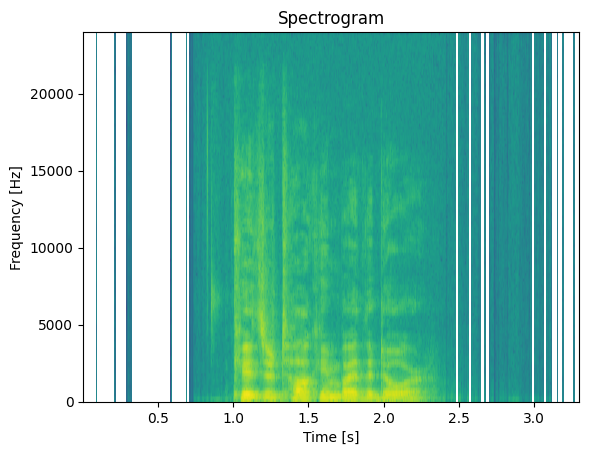

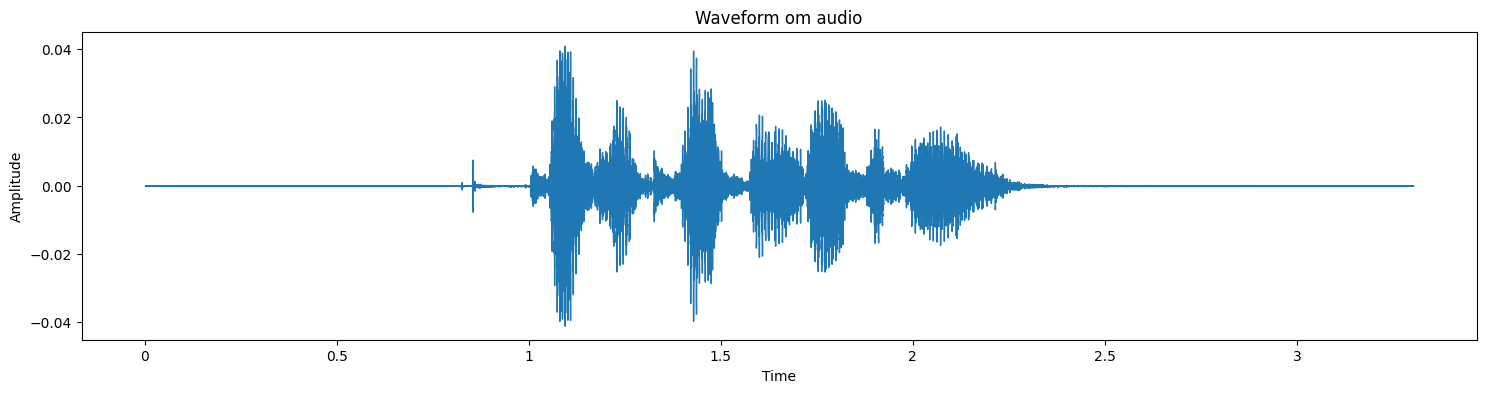

In [16]:

filename = ravdess_dataframe.path[0]

# Plot spectogram
Fs, aud = wavfile.read(filename)
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(aud, Fs=Fs)
plt.title("Spectrogram")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
plt.show()

#Plot waveform
# duration = len(aud)/Fs
# time = np.arange(0,duration,1/Fs) #time vector
# plt.plot(time,aud)
# plt.xlabel('Time [s]')
# plt.ylabel('Amplitude')
# plt.title("Waveform")
# plt.show()

# Plotting Wave 
audio, samplingRate = librosa.load(filename)
fig = plt.figure(figsize=(18, 10))
ax1 = fig.add_subplot(211)
ax1.set_title('Waveform om audio')
ax1.set_ylabel('Amplitude')
librosa.display.waveshow(audio, sr=samplingRate)
fig.subplots_adjust(hspace=.5)

# Loop files

C:\Users\Julia\AppData\Local\Temp\ipykernel_2900\227454262.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  Fs, aud = wavfile.read(filename)


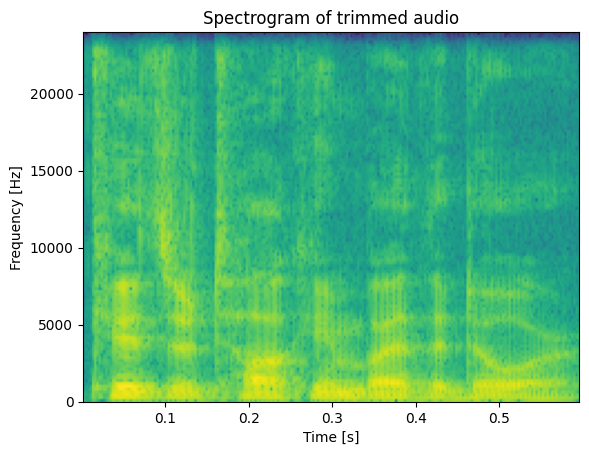

Zero crossing rate
1435.80322265625
mean of RMSE
0.0055415416


C:\Users\Julia\AppData\Local\Temp\ipykernel_2900\3333265948.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  Fs, aud = wavfile.read(filename)


mean of spectral centroid
1506.7462957399212
mean of spectral rolloff
2745.4833984375
mean of spectral contrast
29.33131563257483
mean of spectral flatness
0.019337243294670684
mean of spectral bandwisth
1618.0135154788975
(20, 57)
20


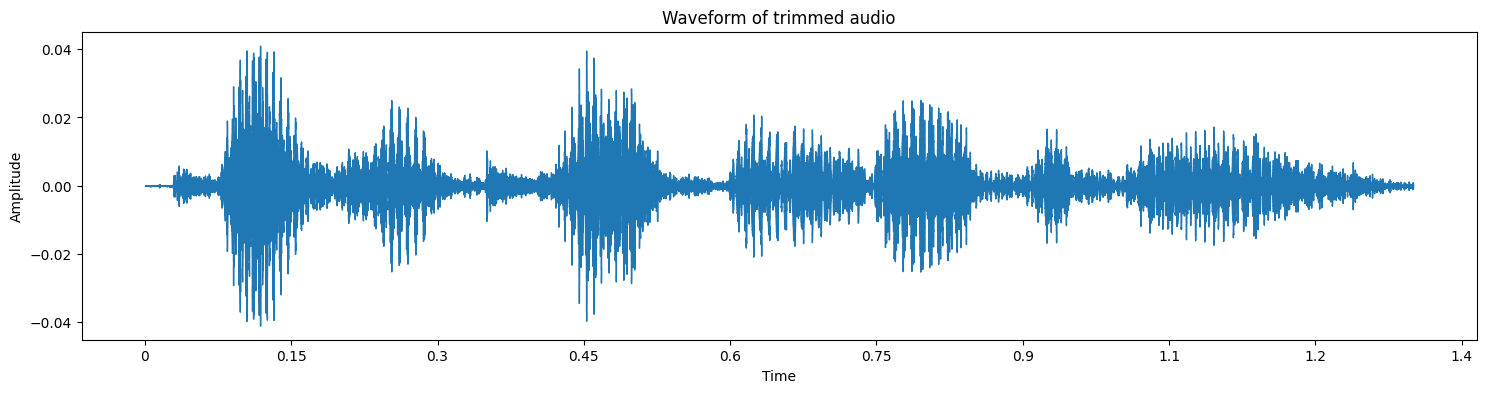

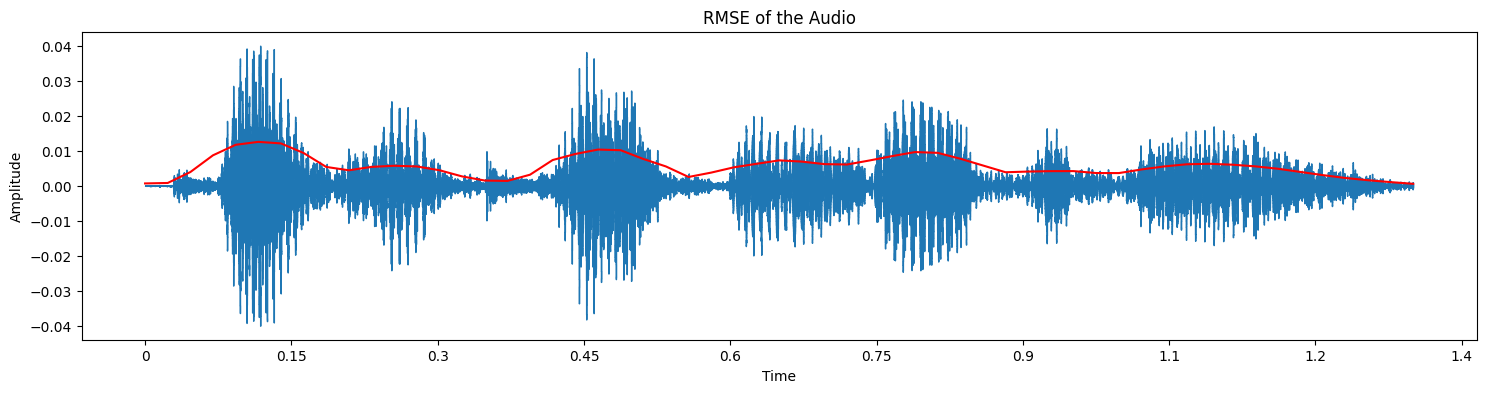

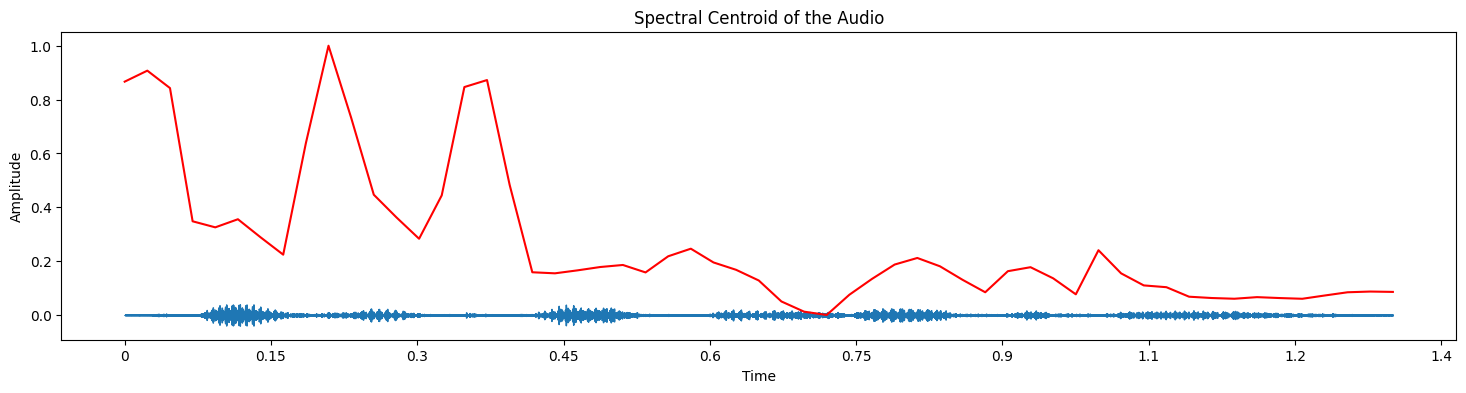

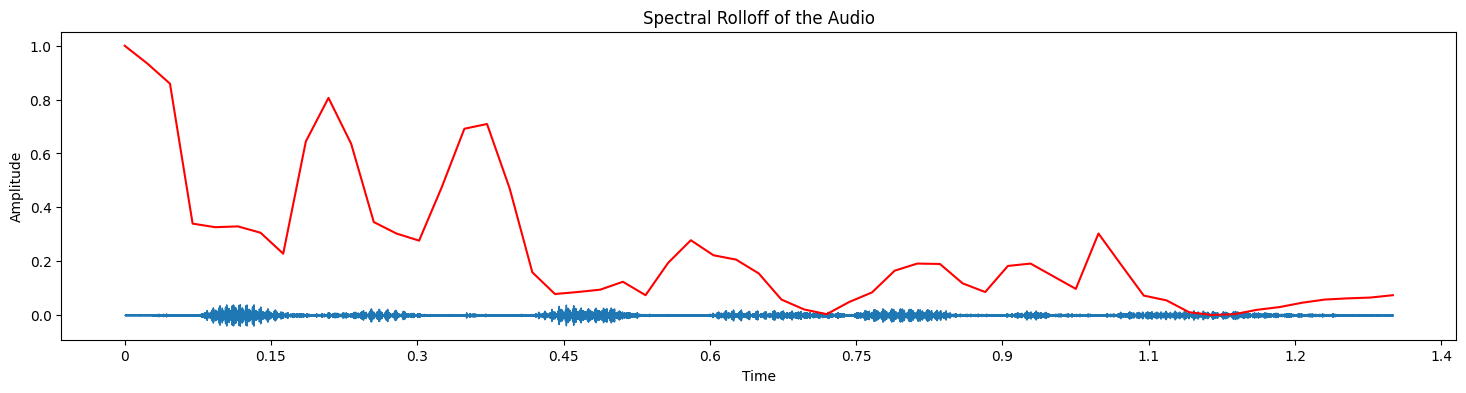

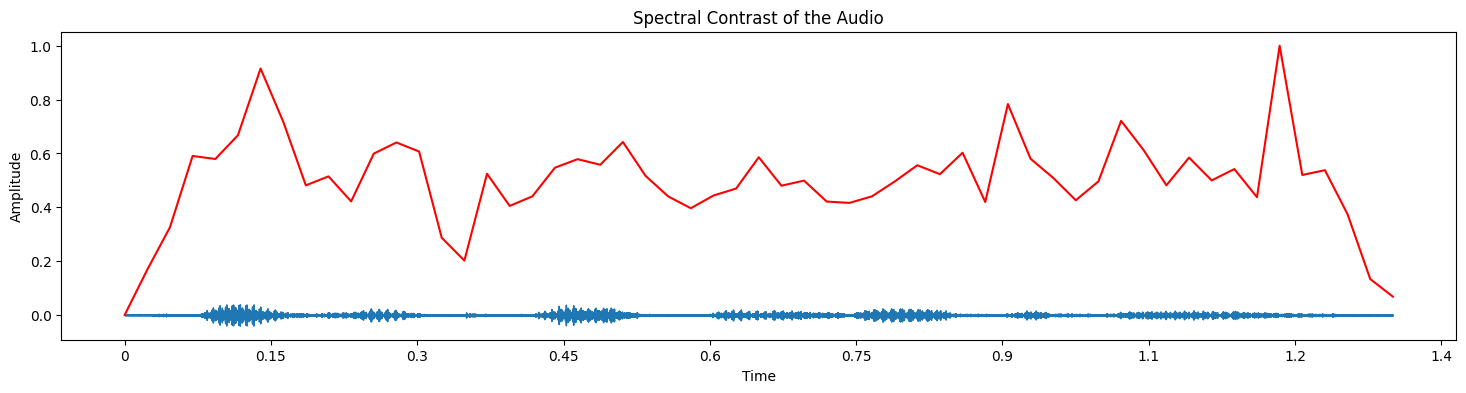

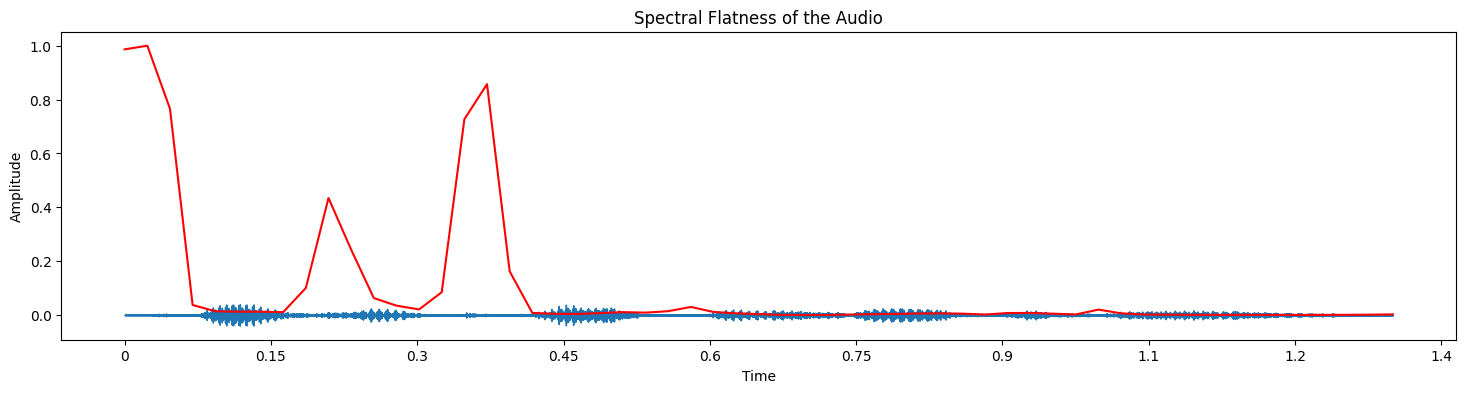

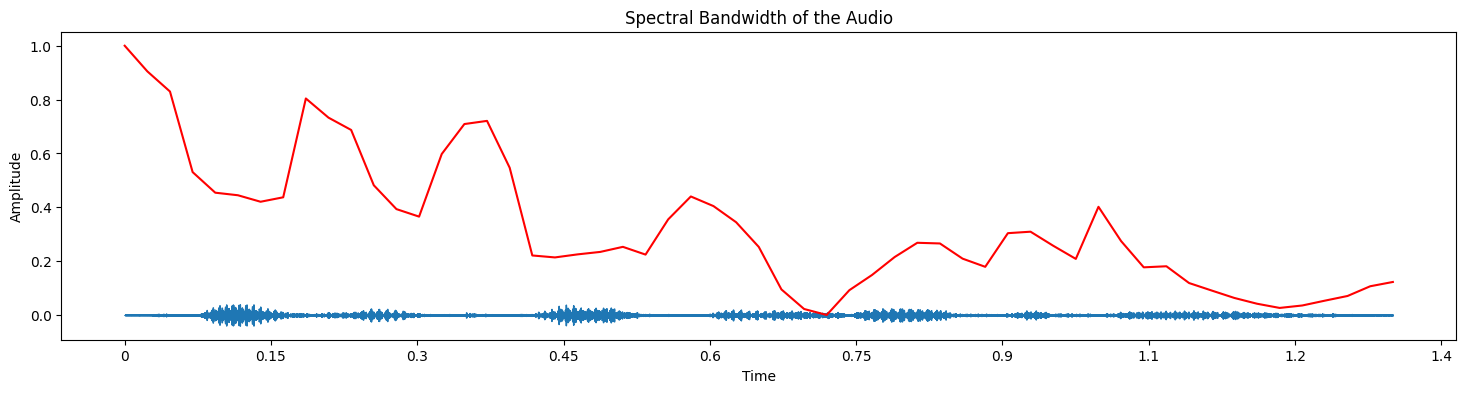

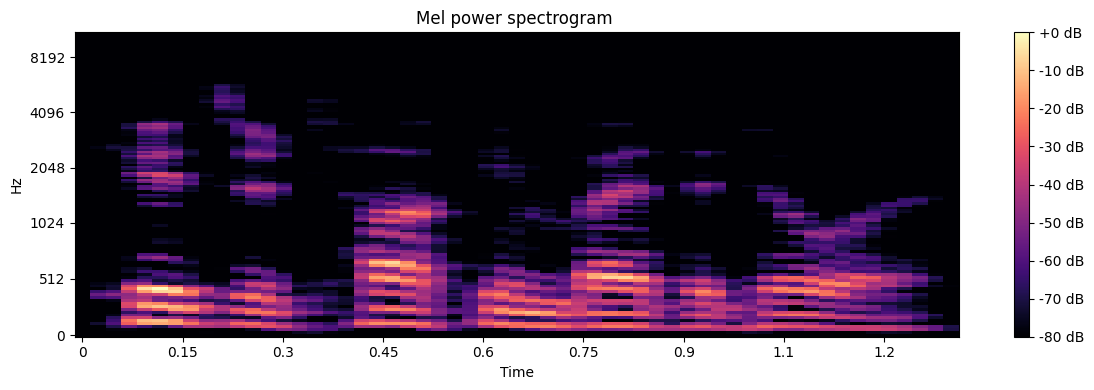

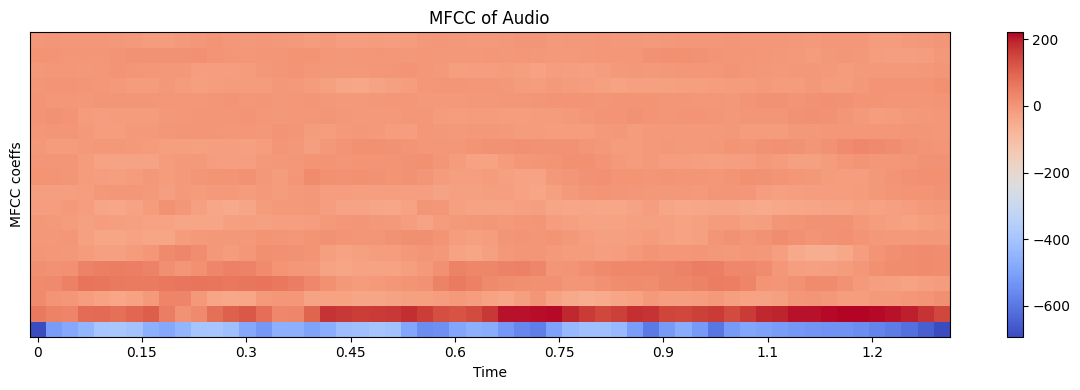

In [27]:
# for index, file in ravdess_dataframe.iterrows():
    # Load the file 
    # Librosa.load returns audio times series (np array) and sampling rate of audio
    #audio, samplingRate = librosa.load(file['path'])

    # remove noise

    # zero crossing rate

audio, samplingRate = librosa.load(filename)

# trim audio
audioTrimmed = trimAudio(audio, samplingRate, filename)
duration = len(audioTrimmed)/samplingRate

# remove noise
audioNoNoise = removeNoise(audioTrimmed, samplingRate, filename)

# FEATURE EXTRACTION 

# zero crossing rate
zero_crossing = zeroCrossingRate(audioNoNoise, samplingRate)
print("Zero crossing rate")
print(sum(zero_crossing)/duration) # zero crossings / seconds

# rmse
rmse = RMSE(audioNoNoise, samplingRate, filename)
print("mean of RMSE") # rmse / frame
print(np.mean(rmse[0])) 

# spectral centroid
spectral_centroids = spectralCentroid(audioNoNoise, samplingRate, filename)
print("mean of spectral centroid")
print(np.mean(spectral_centroids))

# spectral rolloff
spectral_rolloff = spectralRolloff(audioNoNoise, samplingRate, filename)
print("mean of spectral rolloff")
print(np.mean(spectral_rolloff))

# specral contrast
spectral_contrast = spectralContrast(audioNoNoise, samplingRate, filename)
print("mean of spectral contrast")
print(np.mean(spectral_contrast))

# spectral flatness
spectral_flatness = spectralFlatness(audioNoNoise, samplingRate, filename)
print("mean of spectral flatness")
print(np.mean(spectral_flatness))

# spectral bandwidth
spectral_bandwidth = spectralBandwidth(audioNoNoise, samplingRate, filename)
print("mean of spectral bandwisth")
print(np.mean(spectral_bandwidth))

# MFCC
mfcc = MFCC(audioNoNoise, samplingRate, filename)
print(mfcc.shape)

sum_rows = []
for row in mfcc:
    row_sum = sum(row)
    sum_rows.append(row_sum)
print(len(sum_rows))

for sum, index in sum_rows:
    sum_rows[index]=sum/57


# klara tryin


# Trim Audio


In [ ]:
# Trim audio using librosa trim tool, remove if less than 25 db

def trimAudio(audio, samplingRate, filename):
    audioTrim, index = librosa.effects.trim(audio, top_db=25)

    # plot spectogram of trimmed audio
    Fs, aud = wavfile.read(filename)
    powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(audioTrim, Fs=Fs)
    plt.title("Spectrogram of trimmed audio")
    plt.ylabel("Frequency [Hz]")
    plt.xlabel("Time [s]")
    plt.show()

    #plot wavefunction of trimmed audio
    fig = plt.figure(figsize=(18, 10))
    ax1 = fig.add_subplot(211)
    ax1.set_title('Waveform of trimmed audio')
    ax1.set_ylabel('Amplitude')
    librosa.display.waveshow(audioTrim, sr=samplingRate)
    fig.subplots_adjust(hspace=.5)

    return audioTrim


# Remove noise


In [ ]:
# remove noise using wiener filter 
def removeNoise(audio, samplingRate, filename):
    return scipy.signal.wiener(audio)

# Feature extraction

### Zero crossing rate

In [ ]:
def zeroCrossingRate(audio, samplingRate):
    return librosa.zero_crossings(audio)


### Root mean square energy

In [ ]:
def RMSE(audio, samplingRate, filename):

    rmse = librosa.feature.rms(y=audio)

    Fs, aud = wavfile.read(filename) 
    duration = len(audio)/samplingRate # time in seconds
    time = np.arange(0,duration,1/samplingRate) #time vector
    frames = librosa.time_to_frames(duration)
    timeframes = np.arange(0,duration+duration/frames, duration/frames)

    # print("sampling rate:")
    # print(Fs)
    # print(samplingRate)
    # print("audio")
    # print(aud.shape)
    # print(audio.shape)
    # print("frames and rmse")
    # print(frames)
    # print(timeframes.shape)
    # print(rmse[0].shape)
    # print("time and aud")
    # print(time.shape)
    # print(aud.shape)

    # Plotting Wave Form with rmse
    fig = plt.figure(figsize=(18, 10))
    ax1 = fig.add_subplot(211)
    ax1.set_title('RMSE of the Audio')
    ax1.set_ylabel('Amplitude')
    librosa.display.waveshow(audio, sr=samplingRate)
    plt.plot(timeframes,rmse[0], color='r')
    fig.subplots_adjust(hspace=.5)

    return rmse

# kanske ta ut fler värden från rmse vektorn? typ medelvärde, median, standardavikelseS

### Spectral centroid

In [ ]:
def spectralCentroid(audio, samplingRate, filename):
    spectral_centroid = librosa.feature.spectral_centroid(y = audio, sr=samplingRate)[0]
    # Plotting Wave Form and Spectrogram
    frames = range(len(spectral_centroid))
    time = librosa.frames_to_time(frames)
    sc= sklearn.preprocessing.minmax_scale(spectral_centroid,axis=0)
    fig = plt.figure(figsize=(18, 10))
    ax1 = fig.add_subplot(211)
    ax1.set_title('Spectral Centroid of the Audio')
    ax1.set_ylabel('Amplitude')
    librosa.display.waveshow(audio, sr=samplingRate)
    plt.plot(time,sc, color='r')
    fig.subplots_adjust(hspace=.5)

    return spectral_centroid



### Spectral rolloff

In [ ]:
def spectralRolloff(audio, samplingRate, filename):
    spectral_rolloff = librosa.feature.spectral_rolloff(y = audio, sr=samplingRate)[0]
    # Plotting Wave Form and Spectrogram
    frames = range(len(spectral_rolloff))
    time = librosa.frames_to_time(frames)
    sc= sklearn.preprocessing.minmax_scale(spectral_rolloff,axis=0)
    fig = plt.figure(figsize=(18, 10))
    ax1 = fig.add_subplot(211)
    ax1.set_title('Spectral Rolloff of the Audio')
    ax1.set_ylabel('Amplitude')
    librosa.display.waveshow(audio, sr=samplingRate)
    plt.plot(time,sc, color='r')
    fig.subplots_adjust(hspace=.5)

    return spectral_rolloff

### Spectral contrast

In [ ]:
def spectralContrast(audio, samplingRate, filename):
    spectral_contrast = librosa.feature.spectral_contrast(y = audio, sr=samplingRate)[0]
    # Plotting Wave Form and Spectrogram
    frames = range(len(spectral_contrast))
    time = librosa.frames_to_time(frames)
    sc= sklearn.preprocessing.minmax_scale(spectral_contrast,axis=0)
    fig = plt.figure(figsize=(18, 10))
    ax1 = fig.add_subplot(211)
    ax1.set_title('Spectral Contrast of the Audio')
    ax1.set_ylabel('Amplitude')
    librosa.display.waveshow(audio, sr=samplingRate)
    plt.plot(time,sc, color='r')
    fig.subplots_adjust(hspace=.5)

    return spectral_contrast

### Spectral flatness

In [ ]:
#

def spectralFlatness(audio, samplingRate, filename):
    spectral_flatness = librosa.feature.spectral_flatness(y = audio)[0]
    # Plotting Wave Form and Spectrogram
    frames = range(len(spectral_flatness))
    time = librosa.frames_to_time(frames)
    sc= sklearn.preprocessing.minmax_scale(spectral_flatness,axis=0)
    fig = plt.figure(figsize=(18, 10))
    ax1 = fig.add_subplot(211)
    ax1.set_title('Spectral Flatness of the Audio')
    ax1.set_ylabel('Amplitude')
    librosa.display.waveshow(audio, sr=samplingRate)
    plt.plot(time,sc, color='r')
    fig.subplots_adjust(hspace=.5)

    return spectral_flatness

### Spectral bandwidth

In [ ]:
def spectralBandwidth(audio, samplingRate, filename):
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y = audio, sr=samplingRate)[0]
    # Plotting Wave Form and Spectrogram
    frames = range(len(spectral_bandwidth))
    time = librosa.frames_to_time(frames)
    sc= sklearn.preprocessing.minmax_scale(spectral_bandwidth,axis=0)
    fig = plt.figure(figsize=(18, 10))
    ax1 = fig.add_subplot(211)
    ax1.set_title('Spectral Bandwidth of the Audio')
    ax1.set_ylabel('Amplitude')
    librosa.display.waveshow(audio, sr=samplingRate)
    plt.plot(time,sc, color='r')
    fig.subplots_adjust(hspace=.5)

    return spectral_bandwidth

### Mel frequency cepstrum coefficients

In [ ]:
# kmr få fram 39 para   metrar per frame. Så för varje parameter, ta medelvärde, median och standardavvikelse för alla frames så du får totalt 39x3 värden som alla blir olika features. 

def MFCC(audio, samplingRate, filename):
    # Plotting Mel Power Spectrogram
    S_sample = librosa.feature.melspectrogram(y=audio, sr=samplingRate, n_mels=128,n_fft=2048,hop_length=512)

    # Convert to log scale (dB). We'll use the peak power (max) as reference.
    log_S_sample = librosa.amplitude_to_db(S_sample, ref=np.max)

    plt.figure(figsize=(12, 4))
    librosa.display.specshow(log_S_sample, sr=samplingRate, x_axis='time', y_axis='mel')
    plt.title('Mel power spectrogram ')
    plt.colorbar(format='%+02.0f dB')
    plt.tight_layout()

    # Get MFCC
    mfcc = librosa.feature.mfcc(y=audio, sr=samplingRate)

    plt.figure(figsize=(12, 4))
    librosa.display.specshow(mfcc, sr=samplingRate, x_axis='time')
    plt.ylabel('MFCC coeffs')
    plt.xlabel('Time')
    plt.title('MFCC of Audio')
    plt.colorbar()
    plt.tight_layout()

    return mfcc

# Creating training and testing data

# Classification yippi